In [2]:
import pandas as pd

data_web_address = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['pregnancy_x', 
                'plasma_con', 
                'blood_pressure', 
                'skin_mm', 
                'insulin', 
                'bmi', 
                'pedigree_func', 
                'age', 
                'target']

feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address , names=column_names)
all_data.head()

,pregnancy_x,plasma_con,blood_pressure,skin_mm,insulin,bmi,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
all_data.describe()

,pregnancy_x,plasma_con,blood_pressure,skin_mm,insulin,bmi,pedigree_func,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

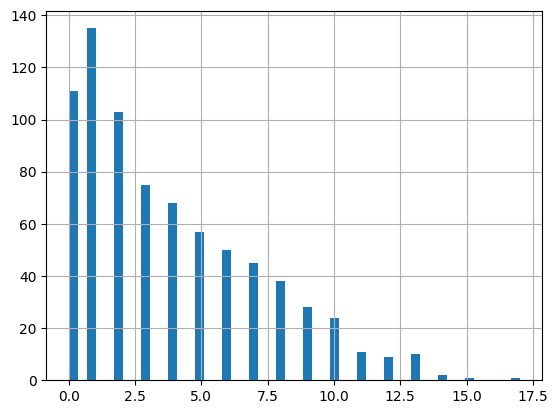

In [4]:
%matplotlib inline

#The default is bins=10 which is hard to read in the visualization.
all_data.pregnancy_x.hist(bins=50)

array([[<Axes: title={'center': 'pregnancy_x'}>,
        <Axes: title={'center': 'plasma_con'}>,
        <Axes: title={'center': 'blood_pressure'}>],
       [<Axes: title={'center': 'skin_mm'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'pedigree_func'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

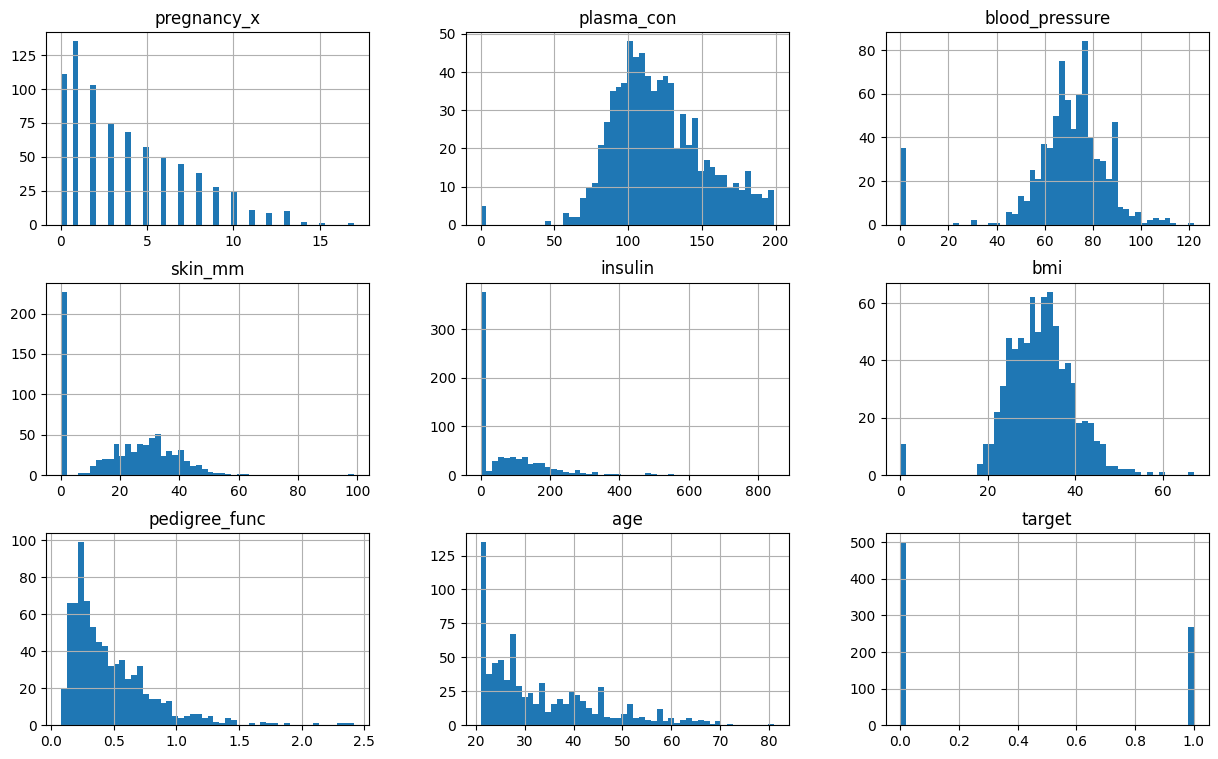

In [5]:
all_data.hist(figsize=(15,9),bins=50)

In [6]:
all_data.target.value_counts()

target
0    500
1    268
Name: count, dtype: int64

In [7]:
import numpy as np
import pandas as pd

X = all_data[feature_names]
y = all_data['target']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    solver="lbfgs",
    max_iter=1000,  # ★ここを増やす
    random_state=0
)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred,labels = [1,0])

array([[33, 21],
       [12, 88]])